In [293]:
import  pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [294]:

df = pd.read_csv('Customer.csv') # importing the dataset

In [295]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [296]:
transform_data=df[['Gender',
                     'Item Purchased',
                     'Category',
                     'Location',
                     'Size',
                     'Color',
                     'Season',
                     'Subscription Status',
                     'Payment Method',
                     'Shipping Type',
                     'Discount Applied',
                     'Promo Code Used',
                     'Preferred Payment Method',
                     'Frequency of Purchases']].copy()

# the following code is to check the number of unique values in each column
# and to check the unique values in each column

#displays the number of unique values in these columns
for col in transform_data.columns:
    print(col,end=f" : {len(transform_data[col].unique())}\n")

Gender : 2
Item Purchased : 25
Category : 4
Location : 50
Size : 4
Color : 25
Season : 4
Subscription Status : 2
Payment Method : 6
Shipping Type : 6
Discount Applied : 2
Promo Code Used : 2
Preferred Payment Method : 6
Frequency of Purchases : 7


In [297]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [298]:


numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['Customer ID'])

# List of numerical columns
num_cols = list(numerical_data.columns)
# Scale numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)
numerical_data_scaled

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


In [299]:
df[num_cols] = numerical_data_scaled

In [300]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,0.718913,Male,Blouse,Clothing,-0.285629,Kentucky,L,Gray,Winter,-0.907584,Yes,Credit Card,Express,Yes,Yes,-0.785831,Venmo,Fortnightly
1,2,-1.648629,Male,Sweater,Clothing,0.178852,Maine,L,Maroon,Winter,-0.907584,Yes,Bank Transfer,Express,Yes,Yes,-1.616552,Cash,Fortnightly
2,3,0.390088,Male,Jeans,Clothing,0.558882,Massachusetts,S,Maroon,Spring,-0.907584,Yes,Cash,Free Shipping,Yes,Yes,-0.162789,Credit Card,Weekly
3,4,-1.517099,Male,Sandals,Footwear,1.276716,Rhode Island,M,Maroon,Spring,-0.349027,Yes,PayPal,Next Day Air,Yes,Yes,1.637107,PayPal,Weekly
4,5,0.061263,Male,Blouse,Clothing,-0.454531,Oregon,M,Turquoise,Spring,-1.466141,Yes,Cash,Free Shipping,Yes,Yes,0.391025,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,-0.267563,Female,Hoodie,Clothing,-1.341267,Virginia,L,Turquoise,Summer,0.628448,No,Cash,2-Day Shipping,No,No,0.460252,Venmo,Weekly
3896,3897,0.521618,Female,Backpack,Accessories,-0.454531,Iowa,L,White,Spring,1.047366,No,PayPal,Store Pickup,No,No,1.083293,Bank Transfer,Bi-Weekly
3897,3898,0.127028,Female,Belt,Accessories,-1.130139,New Jersey,L,Green,Spring,-1.186862,No,Credit Card,Standard,No,No,-0.093563,Venmo,Quarterly
3898,3899,-0.004502,Female,Shoes,Footwear,0.727784,Minnesota,S,Brown,Summer,0.069891,No,PayPal,Express,No,No,-0.093563,Venmo,Weekly


In [301]:
from sklearn.preprocessing import LabelEncoder
# Define high vs low cardinality threshold 
high_cardinality = 3
df.drop('Item Purchased', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.drop('Shipping Type', axis=1, inplace=True)
df.drop('Preferred Payment Method', axis=1, inplace=True)
df.drop('Payment Method', axis=1, inplace=True)
df.drop('Category', axis=1, inplace=True)
df.drop('Color', axis=1, inplace=True)
df.drop('Season', axis=1, inplace=True)

# Label encoding
df['Size'] = df['Size'].map({'S' : 1, 'M' : 2, 'L' : 3, 'XL' : 4})
df['Frequency of Purchases'] = df['Frequency of Purchases'].map({'Bi-Weekly': 6, 'Weekly': 5, 'Fortnightly': 4, 'Monthly' : 3, 'Every 3 Months' : 2, "Quarterly" : 2, "Annually" : 1}) # mapping the values to numerical values

# Discount, Promo code and subscription status are mapped as they are binary
df['Discount Applied'] = df['Discount Applied'].map({'Yes':1, 'No':0})
df.drop('Promo Code Used', axis=1, inplace=True) # dropping the column as it is not needed same as the Discount Applied column
df['Subscription Status'] = df['Subscription Status'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})


df

,Customer ID,Age,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
0,1,0.718913,1,-0.285629,3,-0.907584,1,1,-0.785831,4
1,2,-1.648629,1,0.178852,3,-0.907584,1,1,-1.616552,4
2,3,0.390088,1,0.558882,1,-0.907584,1,1,-0.162789,5
3,4,-1.517099,1,1.276716,2,-0.349027,1,1,1.637107,5
4,5,0.061263,1,-0.454531,2,-1.466141,1,1,0.391025,1
...,...,...,...,...,...,...,...,...,...,...
3895,3896,-0.267563,0,-1.341267,3,0.628448,0,0,0.460252,5
3896,3897,0.521618,0,-0.454531,3,1.047366,0,0,1.083293,6
3897,3898,0.127028,0,-1.130139,3,-1.186862,0,0,-0.093563,2
3898,3899,-0.004502,0,0.727784,1,0.069891,0,0,-0.093563,5


In [302]:
df.drop(columns=['Customer ID'], inplace= True)

df.iloc[:, 0]

0       0.718913
1      -1.648629
2       0.390088
3      -1.517099
4       0.061263
          ...   
3895   -0.267563
3896    0.521618
3897    0.127028
3898   -0.004502
3899    0.521618
Name: Age, Length: 3900, dtype: float64

In [303]:
import pandas as pd 
from sklearn.decomposition import PCA




# Define features
X = df.drop(columns=['Size', 'Frequency of Purchases']).iloc[:, :2]

# Create PCA instance 
pca = PCA(n_components=2)

# Fit and transform data 
X_pca = pca.fit_transform(X)

# Convert to dataframe
df_pca = pd.DataFrame(X_pca)

# Rename columns
df_pca.columns = ['PC1', 'PC2']



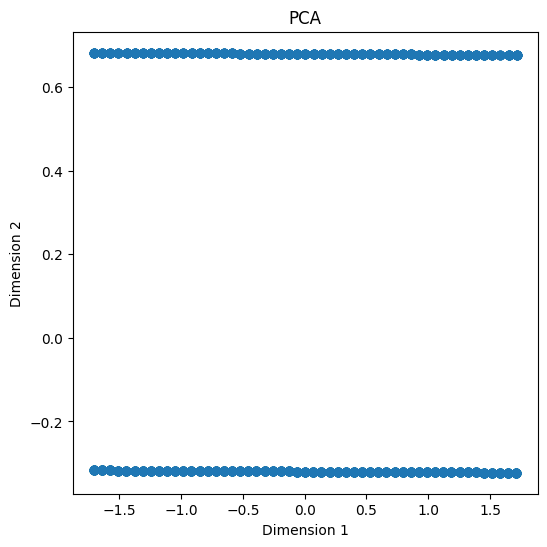

In [304]:


fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
ax.set_title('PCA')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

plt.show()